# Mushroom Stew

## Develop a mushroom stew, that is visually appealing, pleasingly smelling, and preferably non-toxic.

* Explore the fields, which ones could affect the taste or smell, which can be ignored? 
* Which fields may affect if the stew is visually appealing? 
* Use graphics to support your choices

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

In [2]:
# Set Plotting Scale Params
plt.rcParams['figure.figsize'] = (16, 12)
sns.set_style('darkgrid')
%matplotlib inline

## Defining Classes/Functions

In [3]:
### Defining Classes/Functions

def classification(method, x_dat, y_dat, **params): 
    
    #fit model
    mod = Pipeline([('encode', OneHotEncoder(sparse=False)), ('classify', method(**params))])
    mod.fit(x_dat, y_dat)
    y_pred = mod.predict(x_dat)
    
    #print results
    print("Results for {}:".format(method.__name__))
    print(classification_report(y_dat, y_pred))
    print("Test Accuracy: {}%".format(round(mod.score(x_dat, y_dat)*100,2)))
    
    #print confusion matrix
    y_pred_rf = y_pred
    y_true_rf = y_dat
    cm = confusion_matrix(y_true_rf, y_pred_rf)
    f, ax = plt.subplots(figsize =(5,5))
    sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
    plt.xlabel("y_pred_rf")
    plt.ylabel("y_true_rf")
    plt.title('Confusion Matrix')
    plt.show()
    
    #Calculate permutation feature importance
    # permutation feature importance - the decrease in a model score when a single feature value is randomly shuffled
    # thus the drop in the model score is indicative of how much the model depends on the feature
    # (n_jobs=-1 means using all processors)
    imp = permutation_importance(mod, x_dat, y_dat, n_jobs=-1)
    
    #Generate feature importance plot
    plt.figure(figsize=(12,8))
    importance_data = pd.DataFrame({'feature':x_dat.columns, 'importance':imp.importances_mean})
    sns.barplot(x='importance', y='feature', data=importance_data)
    plt.title('Permutation Feature Importance')
    plt.xlabel('Mean Decrease in F1 Score')
    plt.ylabel('')
    plt.show()

## Load Dataset, Explore and Display Features

In [4]:
col_names=['class','cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor','gill-attachment',\
           'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',\
           'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',\
           'veil-color','ring-number','ring-type','spore-print-color','population','habitat'] 

mushroom_df = pd.read_csv('expanded.csv', names=col_names, header=None)

In [5]:
pd.set_option("display.max_columns", None)
mushroom_df.head(5)

class cap-shape cap-surface cap-color bruises?    odor gill-attachment  \
0  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
1  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
2  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
3  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
4  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0      CROWDED    NARROW      WHITE    TAPERING    BULBOUS   
1      CROWDED    NARROW      WHITE    TAPERING    BULBOUS   
2      CROWDED    NARROW       PINK    TAPERING    BULBOUS   
3      CROWDED    NARROW       PINK    TAPERING    BULBOUS   
4      CROWDED    NARROW      BROWN    TAPERING    BULBOUS   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                   SMOOTH                   SMOOTH                  WHITE   
1                   SMOOTH                   SMOOTH                  WHITE   
2                   SMOOTH                   SMOOTH                  WHITE   
3                   SMOOTH                   SMOOTH                  WHITE   
4                   SMOOTH                   SMOOTH                  WHITE   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                  WHITE   PARTIAL      WHITE         ONE   PENDANT   
1                  WHITE   PARTIAL      WHITE         ONE   PENDANT   
2                  WHITE   PARTIAL      WHITE         ONE   PENDANT   
3                  WHITE   PARTIAL      WHITE         ONE   PENDANT   
4                  WHITE   PARTIAL      WHITE         ONE   PENDANT   

  spore-print-color population habitat  
0            PURPLE    SEVERAL   WOODS  
1             BROWN    SEVERAL   WOODS  
2            PURPLE    SEVERAL   WOODS  
3             BROWN    SEVERAL   WOODS  
4            PURPLE    SEVERAL   WOODS

In [6]:
mushroom_df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises?                    object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
mushroom_df.describe()

class cap-shape cap-surface cap-color bruises?  odor gill-attachment  \
count     8416      8416        8416      8416     8416  8416            8416   
unique       2         6           4        10        2     9               2   
top     EDIBLE    CONVEX       SCALY     BROWN       NO  NONE            FREE   
freq      4488      3796        3268      2320     5040  3808            8200   

       gill-spacing gill-size gill-color stalk-shape stalk-root  \
count          8416      8416       8416        8416       8416   
unique            2         2         12           2          5   
top           CLOSE     BROAD       BUFF    TAPERING    BULBOUS   
freq           6824      5880       1728        4864       3800   

       stalk-surface-above-ring stalk-surface-below-ring  \
count                      8416                     8416   
unique                        4                        4   
top                      SMOOTH                   SMOOTH   
freq                       5316                     5076   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8416                   8416      8416       8416   
unique                      9                      9         1          4   
top                     WHITE                  WHITE   PARTIAL      WHITE   
freq                     4744                   4640      8416       8216   

       ring-number ring-type spore-print-color population habitat  
count         8416      8416              8416       8416    8416  
unique           3         5                 9          6       7  
top            ONE   PENDANT             WHITE    SEVERAL   WOODS  
freq          7768      3968              2424       4064    3160

In [8]:
profile = ProfileReport(mushroom_df)
profile

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Engineering


### The field `veil-type` doesn't contribute any information (all are the same value) and can be dropped from the dataset

In [9]:
mushroom_df_adj = mushroom_df.drop('veil-type', axis=1)
mushroom_df_adj.shape

(8416, 22)

### Label encode the "class" column

In [10]:
# label_encoder object
label_encoder =LabelEncoder()
# Encode labels in column. 
mushroom_df_adj['class']= label_encoder.fit_transform(mushroom_df_adj['class']) # 0 is Edible, 1 is Poisonous

### Split into feature and target data

In [11]:
# Note these x and y values will be used in the first set of classification models
# The second set of classification models uses this y value but a modified x value
x_mushroom = mushroom_df_adj.drop(["class"], axis=1)
y_mushroom = mushroom_df_adj["class"]

## Feature Exploration

### Violin Plot

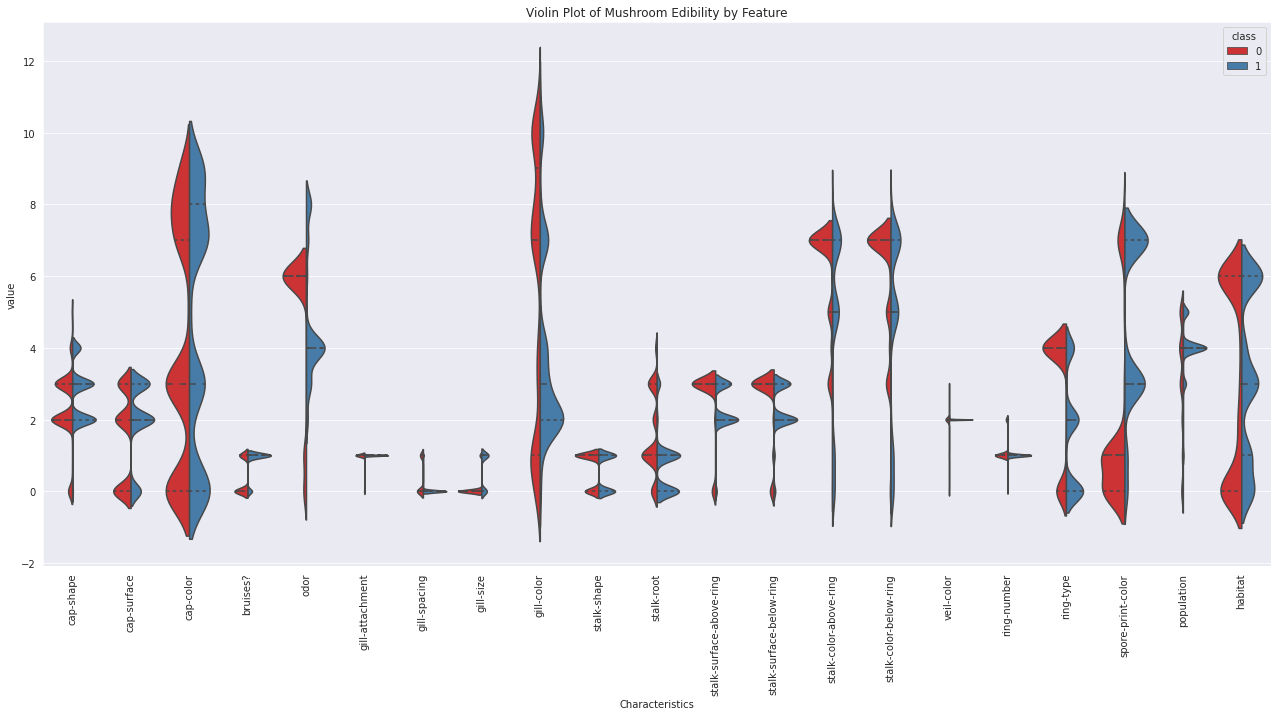

In [12]:
# Creating Violin Plot for encoded features

labelencoder=LabelEncoder() # Must encode for this plot type

mushroom_df_encoded = mushroom_df.copy()
for column in mushroom_df_encoded.columns:
    mushroom_df_encoded[column] = labelencoder.fit_transform(mushroom_df_encoded[column])

df_div = pd.melt(mushroom_df_encoded.drop("veil-type",axis=1),
                 'class', var_name='Characteristics')
fig, ax = plt.subplots(figsize=(22,10))

p = sns.violinplot(ax = ax, x='Characteristics', y='value',
                   hue='class', split = True, data=df_div,
                   inner = 'quartile', palette = 'Set1')

df_no_class = mushroom_df_encoded.drop(['class','veil-type'],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns))
ax.set_title('Violin Plot of Mushroom Edibility by Feature')
sns.set(font_scale=1.8)
plt.show()

As we can see from the above violin plot, odor, gill color, spore print color, and habitat seem to have strong indications of edibility. Let's see if our intuition is correct by looking at the edibility numbers for each variable.

### Edibility Stacked Barcharts

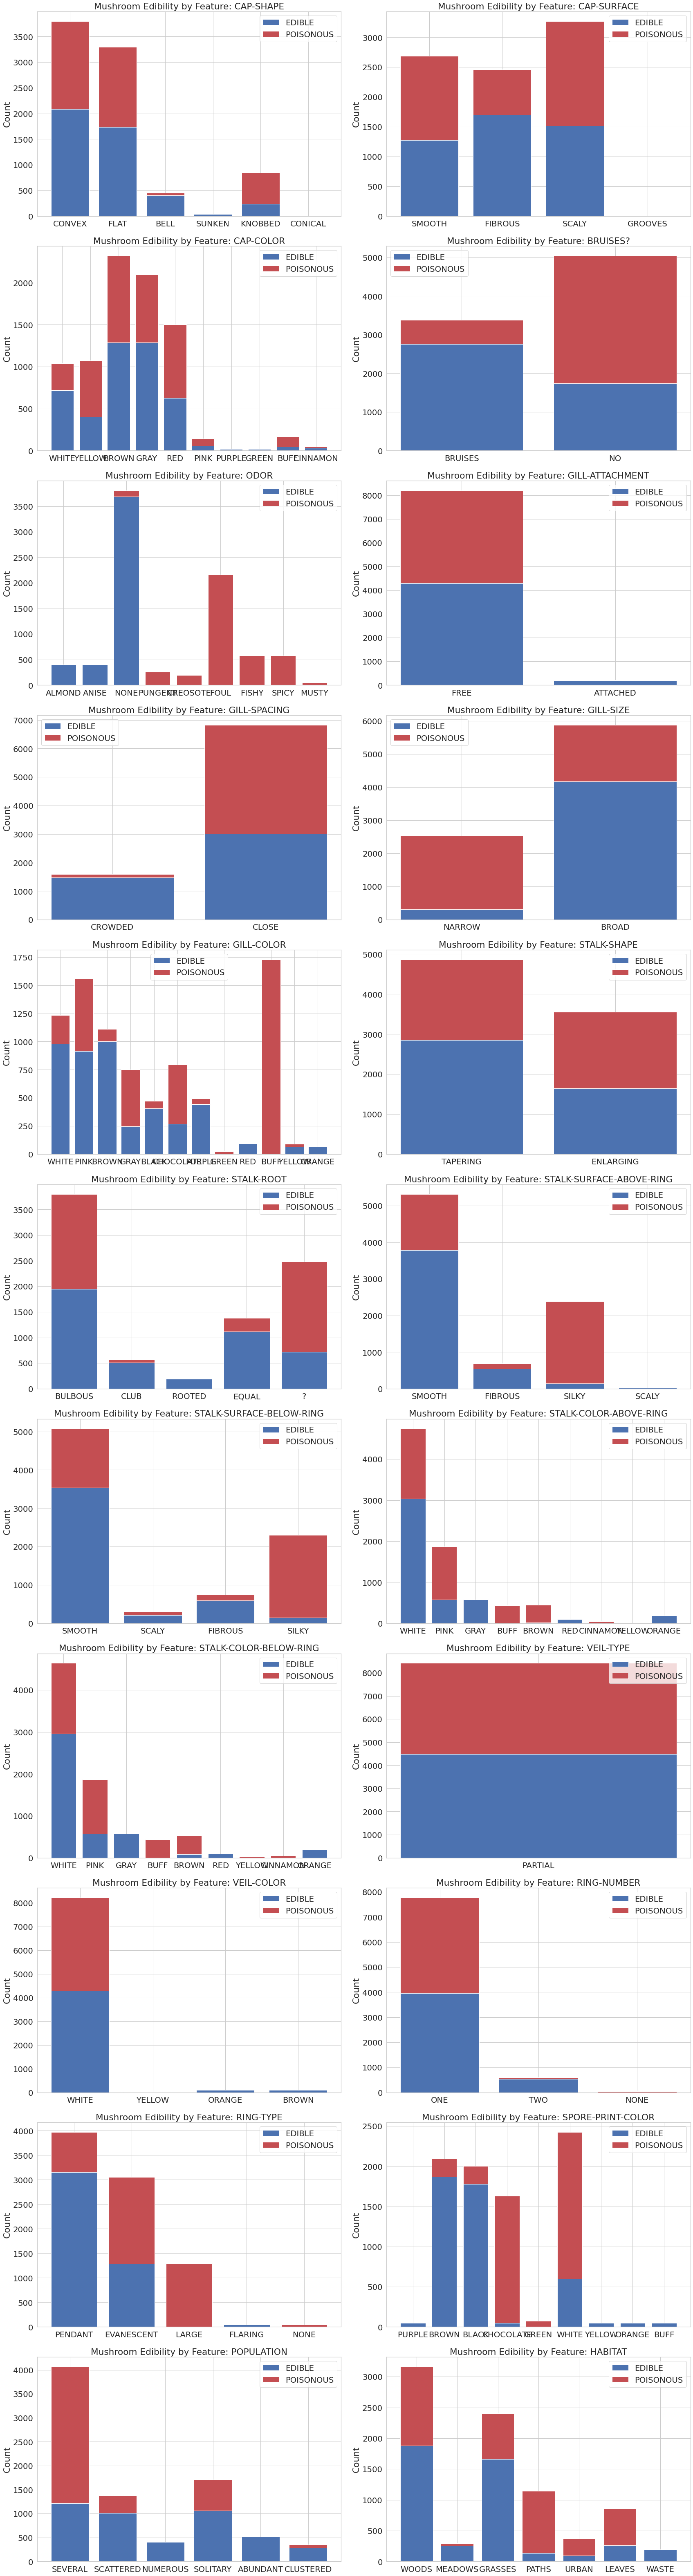

In [13]:
# Creating stacked barcharts for each feature in the dataset
sns.set_style("whitegrid")

fig, axes = plt.subplots(11,2, figsize=(24,88))
axes = axes.flatten()

for column, ax in zip(mushroom_df.drop(["class"], axis=1).columns, axes):
    uniq_vals = mushroom_df[column].unique()
    count_edible=[]
    count_poison=[]

    for j in uniq_vals:
        count_edible.append(len(mushroom_df[(mushroom_df[column]==j)
                                            & (mushroom_df['class']=='EDIBLE')]))
        # Edible Bar
        
        count_poison.append(len(mushroom_df[(mushroom_df[column]==j)
                                            & (mushroom_df['class']=='POISONOUS')]))
        # Poison Bar
    ax.bar(uniq_vals, count_edible, label='EDIBLE',color='b')
    ax.bar(uniq_vals, count_poison, label='POISONOUS', bottom=count_edible,color='r')

    ax.set_ylabel('Count')
    ax.set_title('Mushroom Edibility by Feature: '+column.upper())
    ax.legend()

fig.tight_layout()
plt.show()

From the above histograms, we can conclude that `bruises?`might also be a good indicator of edibility.

### Pleasant Smell

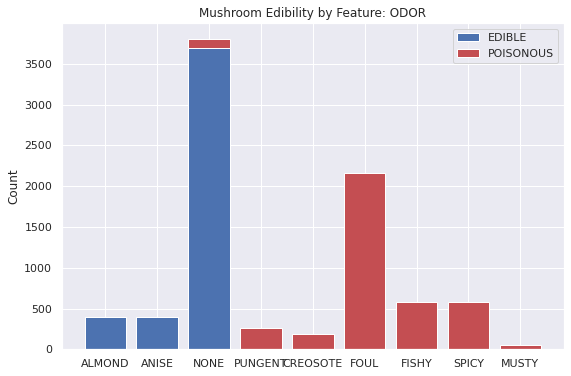

In [14]:
good_odor = ['ALMOND','ANISE','SPICY'] # Up to interpretation I suppose
sns.set()

uniq_vals = mushroom_df['odor'].unique()
count_edible=[]
count_poison=[]
for j in uniq_vals:
    count_edible.append(len(mushroom_df[(mushroom_df['odor']==j)
                                            & (mushroom_df['class']=='EDIBLE')]))
    count_poison.append(len(mushroom_df[(mushroom_df['odor']==j)
                                            & (mushroom_df['class']=='POISONOUS')]))
fig, ax = plt.subplots(figsize=(9,6))

ax.bar(uniq_vals, count_edible, label='EDIBLE',color='b')
ax.bar(uniq_vals, count_poison, label='POISONOUS', bottom=count_edible,color='r')

ax.set_ylabel('Count')
ax.set_title('Mushroom Edibility by Feature: ODOR')
ax.legend()
plt.show()

We can see from the above plot that nearly all mushrooms with a smell that is not Almond, Anise, or None are Poisonous. To make a pleasant smelling soup is to then indeed make an edible one, which will be quite handy for foragers.

### Correlation Heatmaps

Let's look at the data another way, and observe what kind of effect different combinations of the variables have.

In [15]:
# Create crosstables of different groupings of the variables
cap_xtab = pd.crosstab(mushroom_df['class'],\
                   columns=[mushroom_df['cap-shape'], mushroom_df['cap-surface'], \
                            mushroom_df['cap-color'], mushroom_df['bruises?']]) 

gill_xtab = pd.crosstab(mushroom_df['class'],\
                    columns=[mushroom_df['odor'],mushroom_df['gill-attachment'],\
                            mushroom_df['gill-spacing'], mushroom_df['gill-size'], \
                            mushroom_df['gill-color']])

stalk_xtab = pd.crosstab(mushroom_df['class'],\
                     columns=[mushroom_df['stalk-shape'],mushroom_df['stalk-root'],\
                            mushroom_df['stalk-surface-above-ring'],\
                            mushroom_df['stalk-surface-below-ring'],\
                            mushroom_df['stalk-color-above-ring'],\
                            mushroom_df['stalk-color-below-ring']])

other_xtab = pd.crosstab(mushroom_df['class'],\
                    columns=[mushroom_df['veil-type'],mushroom_df['veil-color'],\
                            mushroom_df['ring-number'],mushroom_df['spore-print-color'],
                            mushroom_df['population'], mushroom_df['habitat']])


In [16]:
# An example of what one of the cross tables looks like 
gill_xtab

odor            ALMOND                                          ANISE        \
gill-attachment   FREE                                           FREE         
gill-spacing     CLOSE                       CROWDED            CLOSE         
gill-size        BROAD                        NARROW            BROAD         
gill-color       BLACK BROWN GRAY PINK WHITE   BROWN PINK WHITE BLACK BROWN   
class                                                                         
EDIBLE              64    96   64   32    96      16   16    16    64    96   
POISONOUS            0     0    0    0     0       0    0     0     0     0   

odor                                               CREOSOTE                   \
gill-attachment                                        FREE                    
gill-spacing                    CROWDED               CLOSE                    
gill-size                        NARROW              NARROW                    
gill-color      GRAY PINK WHITE   BROWN PINK WHITE    BROWN GRAY PINK PURPLE   
class                                                                          
EDIBLE            64   32    96      16   16    16        0    0    0      0   
POISONOUS          0    0     0       0    0     0       24   24   24     24   

odor                                      FISHY      FOUL                  \
gill-attachment                            FREE      FREE                   
gill-spacing    CROWDED                   CLOSE     CLOSE                   
gill-size        NARROW                  NARROW     BROAD                   
gill-color        BROWN GRAY PINK PURPLE   BUFF CHOCOLATE GRAY PINK WHITE   
class                                                                       
EDIBLE                0    0    0      0      0         0    0    0     0   
POISONOUS            24   24   24     24    576       528  432  528    96   

odor                      MUSTY                         NONE                \
gill-attachment        ATTACHED         FREE        ATTACHED                 
gill-spacing              CLOSE        CLOSE           CLOSE                 
gill-size       NARROW    BROAD        BROAD           BROAD                 
gill-color        BUFF    WHITE YELLOW WHITE YELLOW    BROWN ORANGE YELLOW   
class                                                                        
EDIBLE               0        0      0     0      0       64     64     64   
POISONOUS          576       12     12    12     12        0      0      0   

odor                                                                           \
gill-attachment  FREE                                                           
gill-spacing    CLOSE                                                           
gill-size       BROAD                                  NARROW                   
gill-color      BROWN GRAY GREEN PINK PURPLE RED WHITE  BLACK BROWN CHOCOLATE   
class                                                                           
EDIBLE            432    0     0  432    432  96   576     24    24        12   
POISONOUS           0   24    24    0      0   0    24      0     0         0   

odor                                                                      \
gill-attachment                                                            
gill-spacing                           CROWDED                             
gill-size                                BROAD                             
gill-color      GRAY PINK PURPLE WHITE   BLACK BROWN CHOCOLATE GRAY PINK   
class                                                                      
EDIBLE            24   36     12    12     256   256       256   96  352   
POISONOUS          0    0      0    32       0     0         0    0    0   

odor                                PUNGENT                   SPICY  
gill-attachment                        FREE                    FREE  
gill-spacing                          CLOSE                   CLOSE  
gill-size       

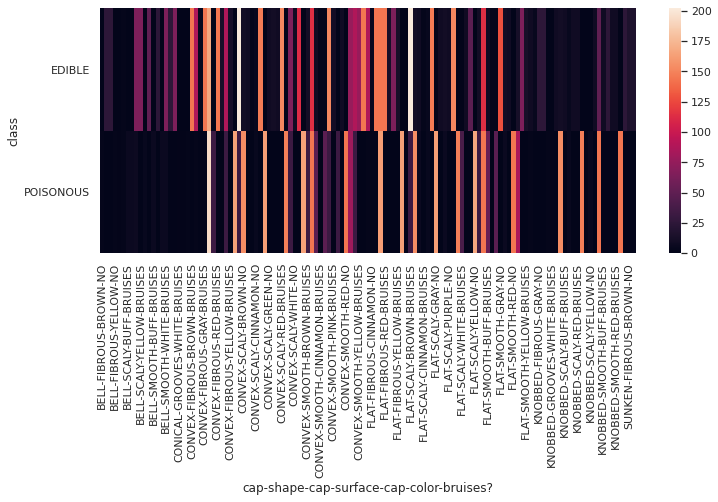

In [17]:
fig, ax = plt.subplots(figsize=(12,4.5))
heatmap=sns.heatmap(cap_xtab)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.show()

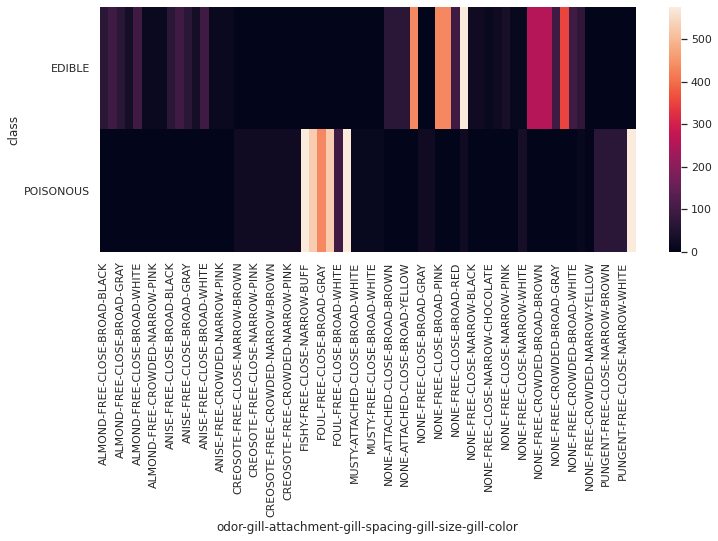

In [18]:
fig, ax = plt.subplots(figsize=(12,4.5))
heatmap=sns.heatmap(gill_xtab)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.show()

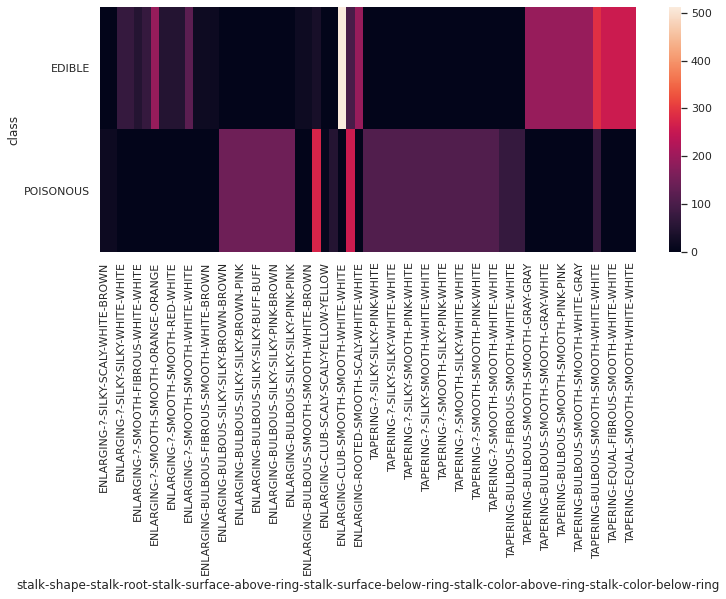

In [19]:
fig, ax = plt.subplots(figsize=(12,4.5))
heatmap=sns.heatmap(stalk_xtab)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.show()

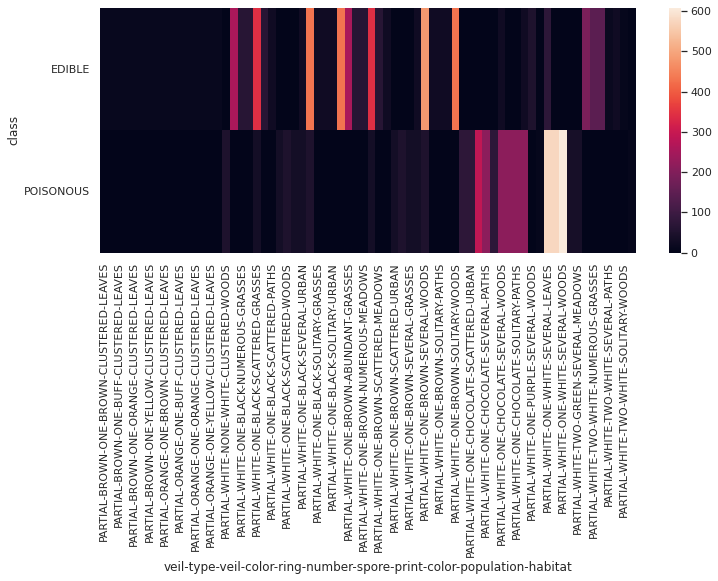

In [20]:
fig, ax = plt.subplots(figsize=(12,4.5))
heatmap=sns.heatmap(other_xtab)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.show()

## Sample Decision Tree

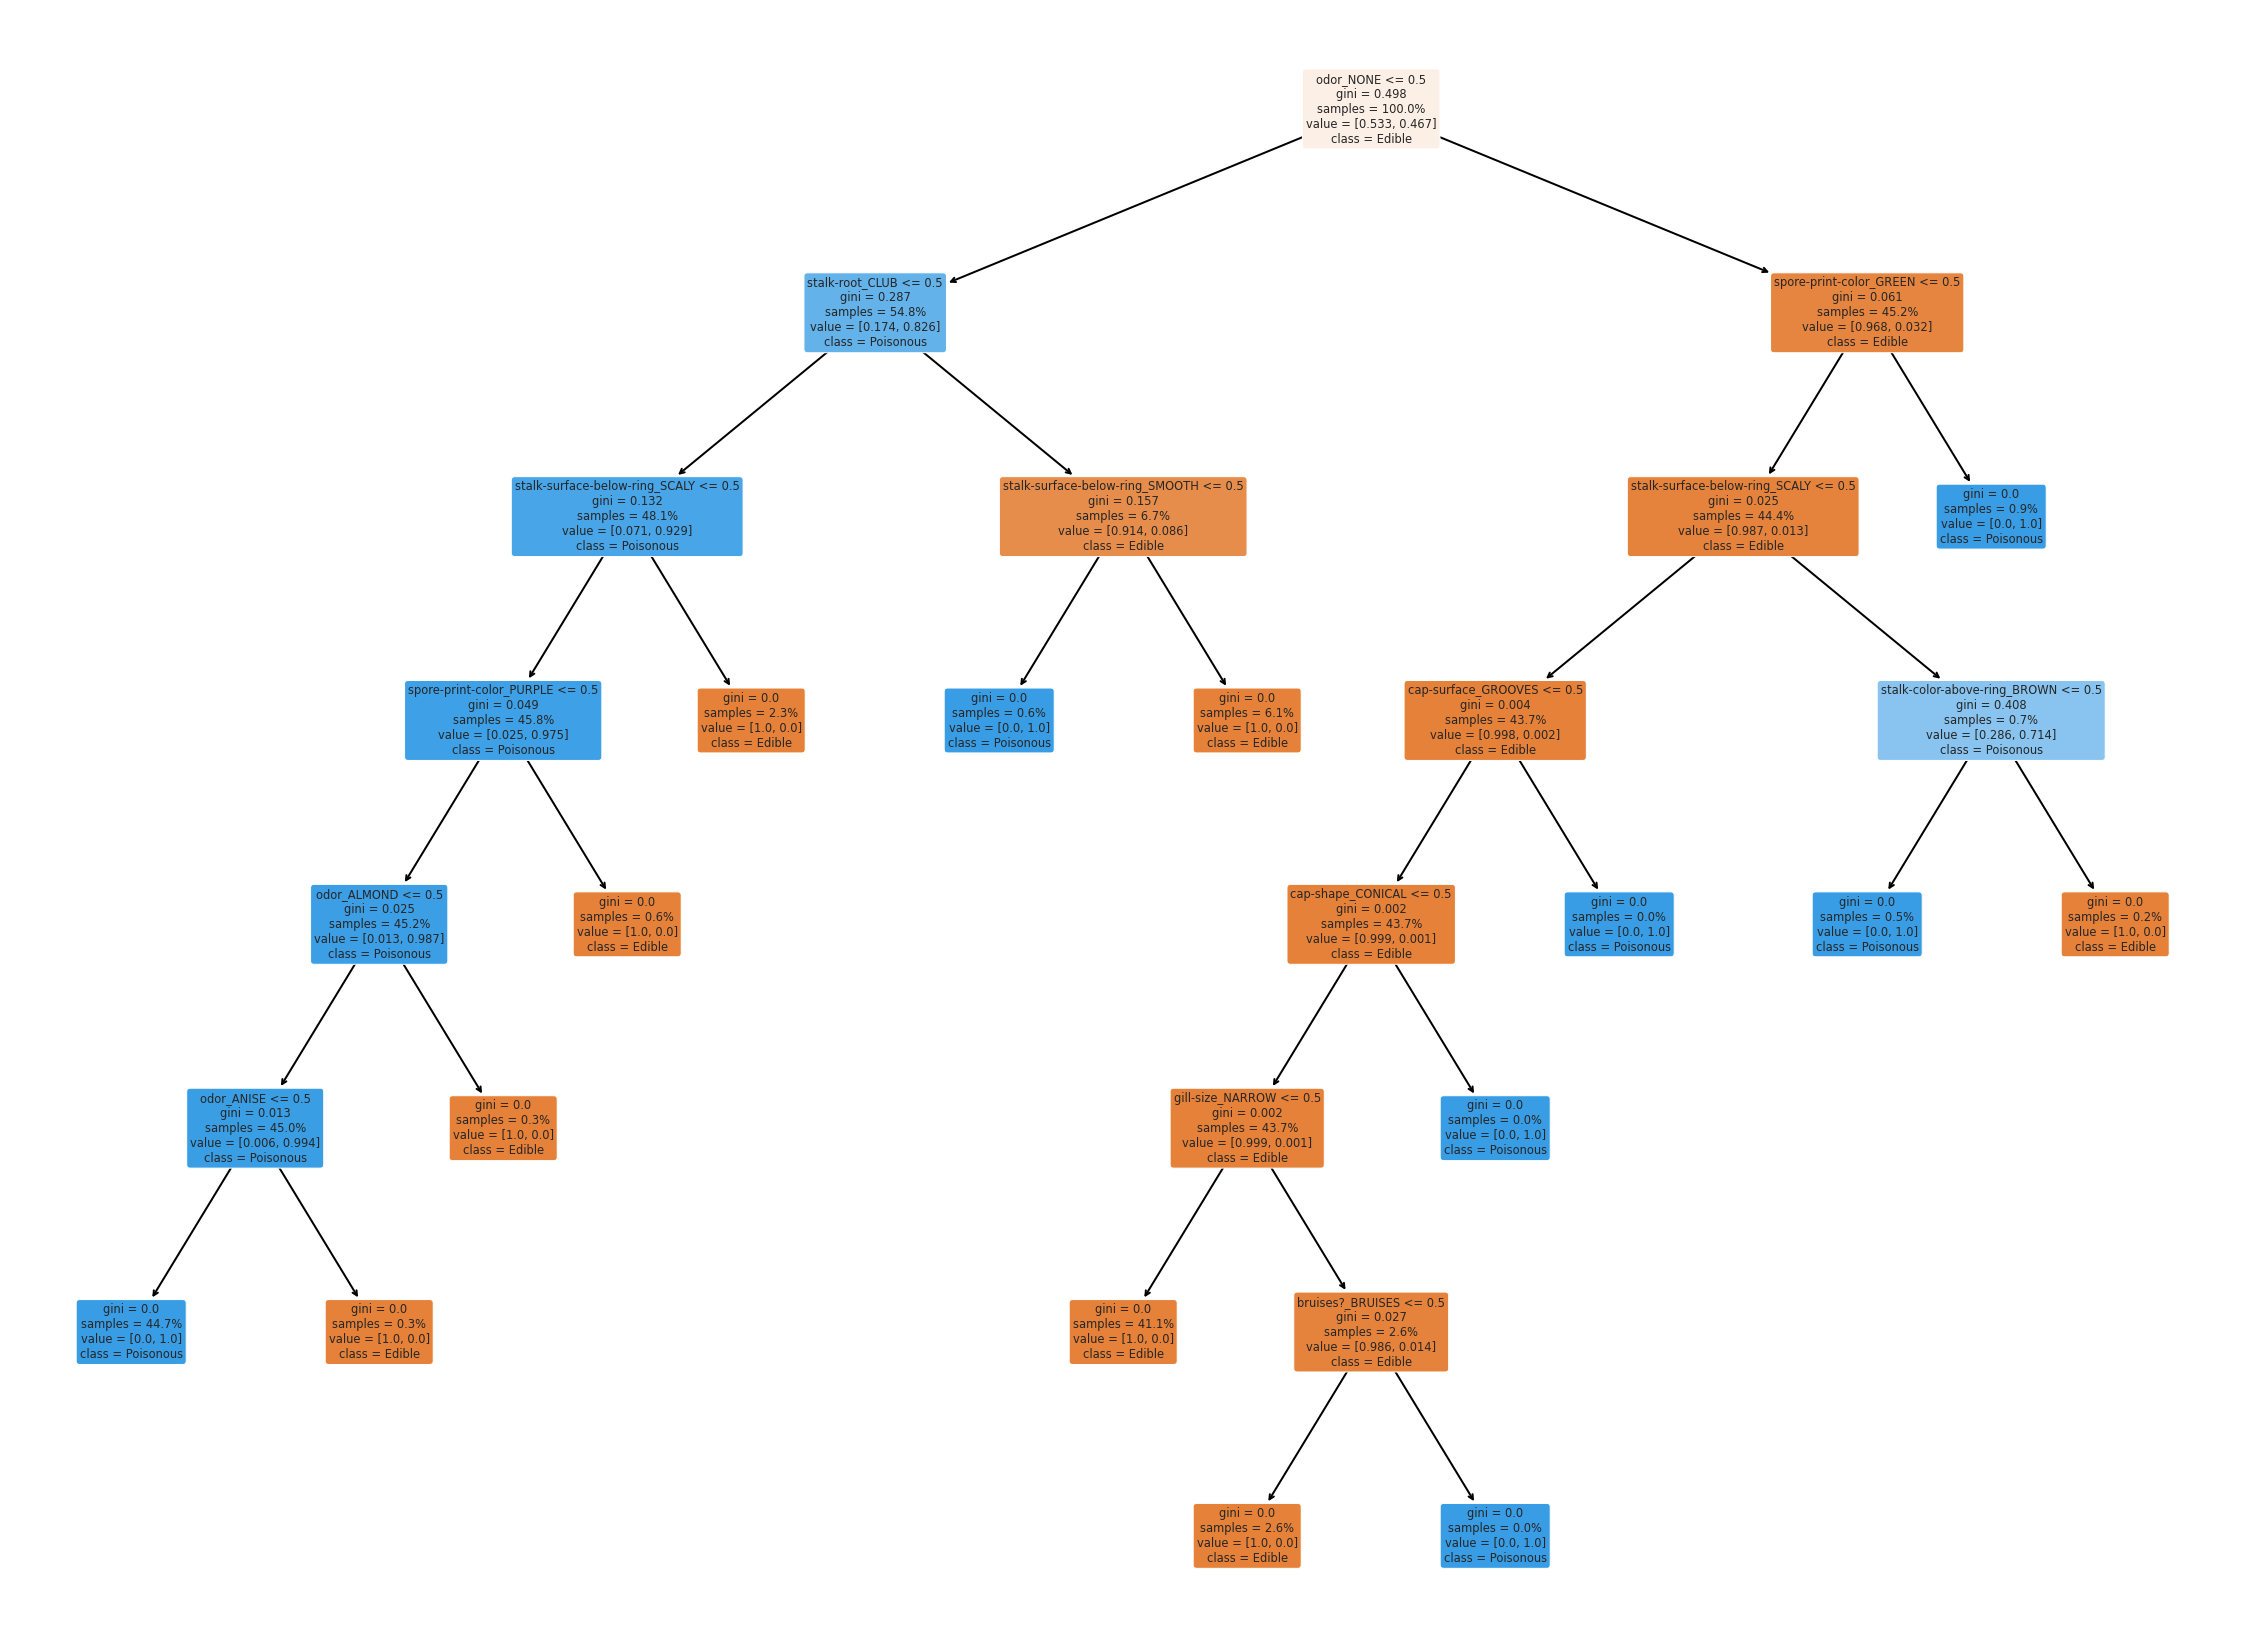

In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

dummies = pd.get_dummies(x_mushroom)
tree = DecisionTreeClassifier()
tree.fit(dummies, y_mushroom)

fig = plt.figure(figsize=(40,30))
out = plot_tree(tree,filled=True, feature_names = dummies.columns, rounded=True, proportion=True,\
                class_names = ['Edible', 'Poisonous'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

In [22]:
featurelist=[]
for i in dummies.columns:
    featurelist.append(i)

In [23]:
print(export_text(tree, feature_names = featurelist))

|--- odor_NONE <= 0.50
|   |--- stalk-root_CLUB <= 0.50
|   |   |--- stalk-surface-below-ring_SCALY <= 0.50
|   |   |   |--- spore-print-color_PURPLE <= 0.50
|   |   |   |   |--- odor_ALMOND <= 0.50
|   |   |   |   |   |--- odor_ANISE <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- odor_ANISE >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- odor_ALMOND >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- spore-print-color_PURPLE >  0.50
|   |   |   |   |--- class: 0
|   |   |--- stalk-surface-below-ring_SCALY >  0.50
|   |   |   |--- class: 0
|   |--- stalk-root_CLUB >  0.50
|   |   |--- stalk-surface-below-ring_SMOOTH <= 0.50
|   |   |   |--- class: 1
|   |   |--- stalk-surface-below-ring_SMOOTH >  0.50
|   |   |   |--- class: 0
|--- odor_NONE >  0.50
|   |--- spore-print-color_GREEN <= 0.50
|   |   |--- stalk-surface-below-ring_SCALY <= 0.50
|   |   |   |--- cap-surface_GROOVES <= 0.50
|   |   |   |   |--- cap-shape_CONICAL <= 0.50
|   |

## Classification Models
#### Note: where applicable, random_state=42 in our models sets a seed so that results will be reproducible

### Decision Tree Classifier

Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


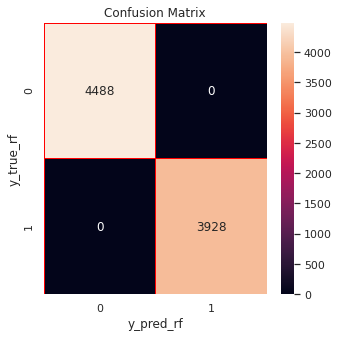

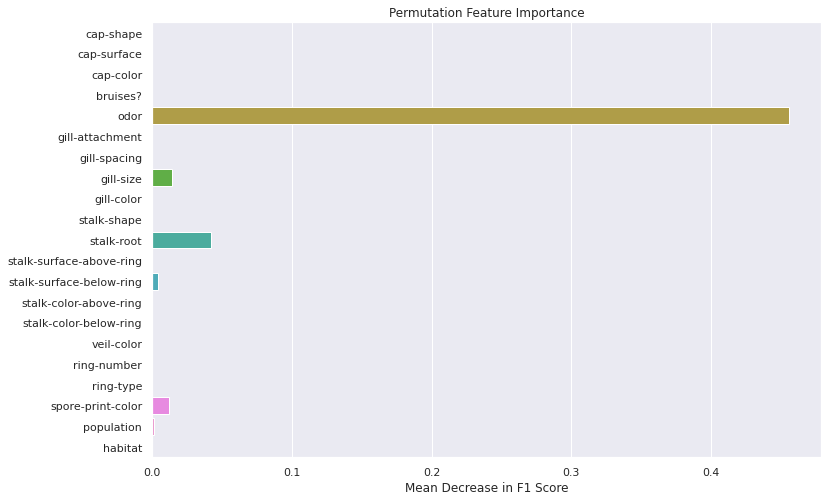

In [24]:
classification(DecisionTreeClassifier, x_mushroom, y_mushroom, random_state=42)

### C-Support Vector Classifier

Results for SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


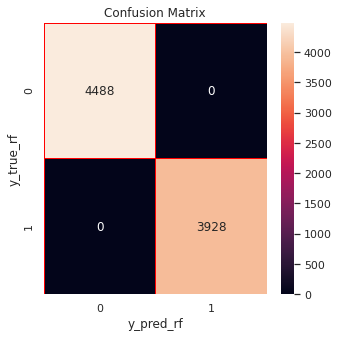

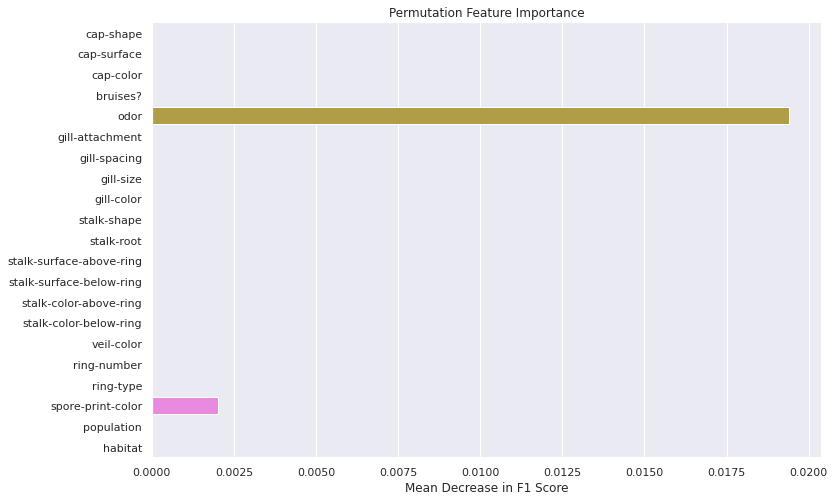

In [25]:
classification(SVC, x_mushroom, y_mushroom, random_state=42)

### K Neighbors Classifier

Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


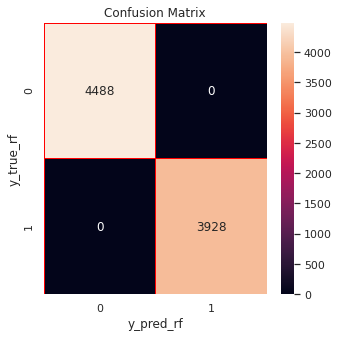

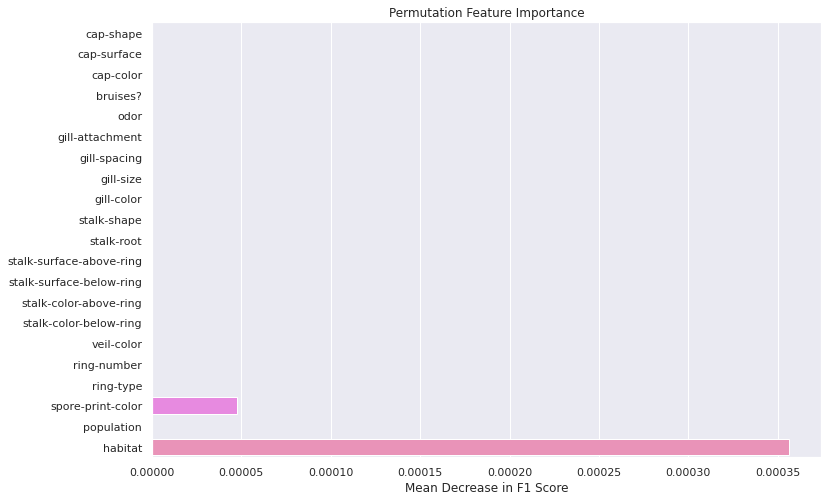

In [26]:
classification(KNeighborsClassifier, x_mushroom, y_mushroom, n_neighbors=5)

### Logistic Regression Classifier

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


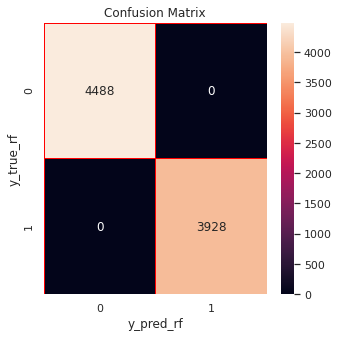

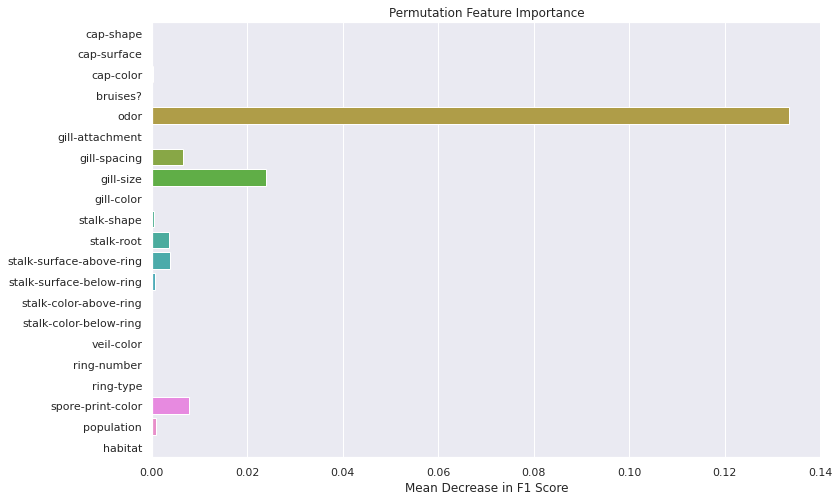

In [27]:
classification(LogisticRegression, x_mushroom, y_mushroom, random_state=42) 

### Gaussian Naive Bayes Classifier

Results for GaussianNB:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4488
           1       0.93      1.00      0.96      3928

    accuracy                           0.96      8416
   macro avg       0.96      0.96      0.96      8416
weighted avg       0.96      0.96      0.96      8416

Test Accuracy: 96.22%


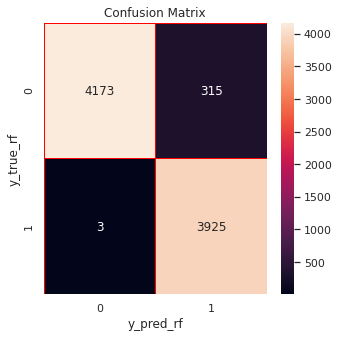

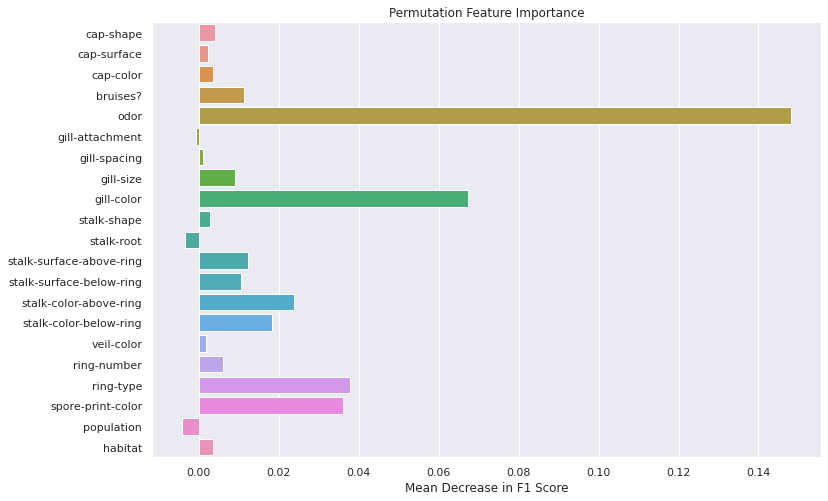

In [28]:
classification(GaussianNB, x_mushroom, y_mushroom)

### Random Forest Classifier

Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


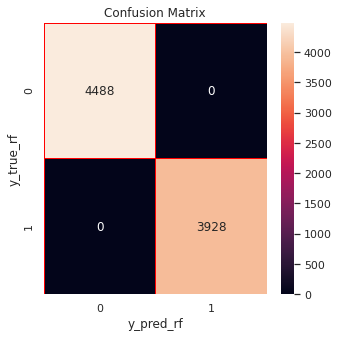

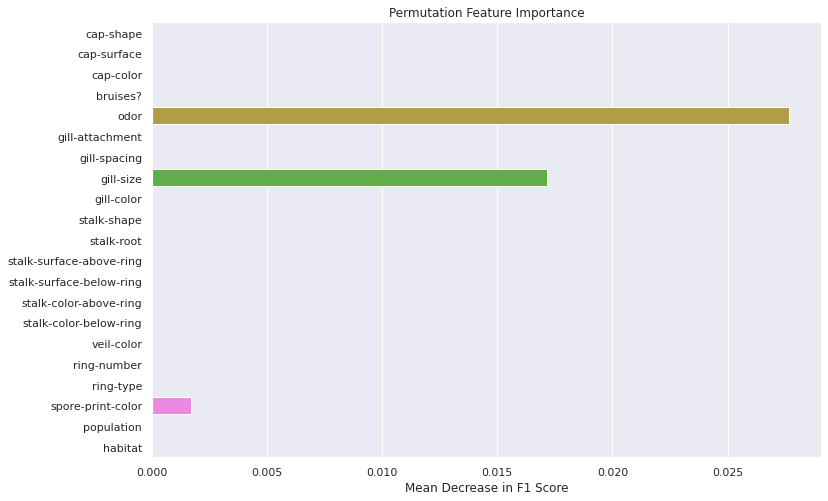

In [29]:
# Note: random_state=42 sets a seed so the results are reproducible
classification(RandomForestClassifier, x_mushroom, y_mushroom, n_estimators=100, random_state=42)  

### Linear Discriminant Classifier

Results for LinearDiscriminantAnalysis:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 99.95%


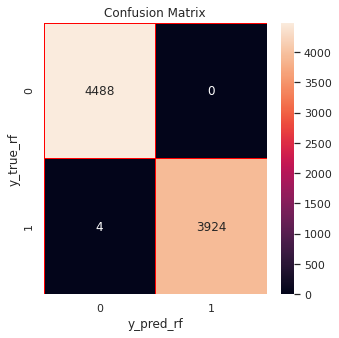

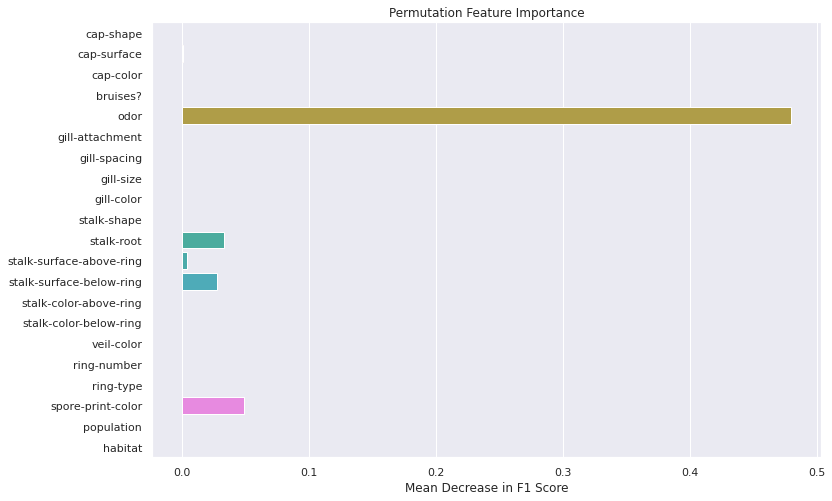

In [30]:
classification(LinearDiscriminantAnalysis, x_mushroom, y_mushroom)

### Quadratic Discriminant Classifier

/home/pogags/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Results for QuadraticDiscriminantAnalysis:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


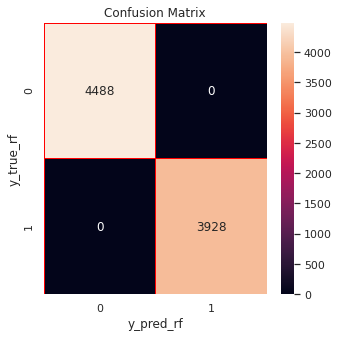

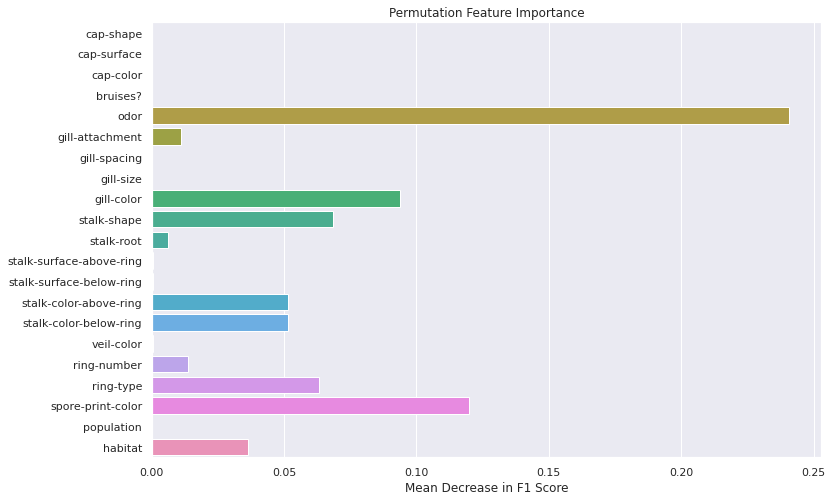

In [31]:
classification(QuadraticDiscriminantAnalysis, x_mushroom, y_mushroom)

### Neural Network Multi-layer Perceptron Classifier

Results for MLPClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


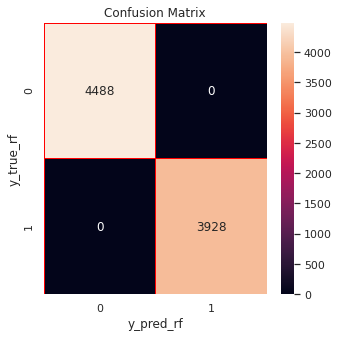

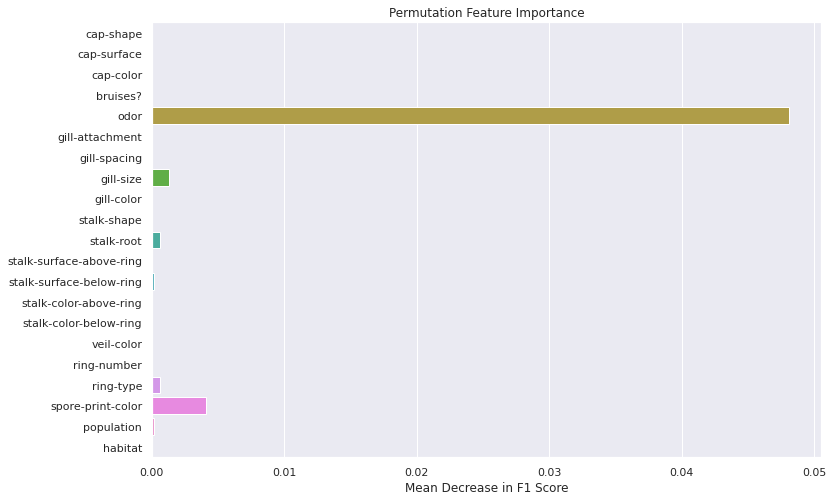

In [32]:
classification(MLPClassifier, x_mushroom, y_mushroom, random_state=42)

## COVID version: what if we lose our sense of smell?

Odor is obviously the most powerful predictive attribute. What happens to our models if we drop that variable and we can only identify mushrooms visually?

In [33]:
# create the dataframes and appropriate variables 
x_visual = x_mushroom.drop(columns='odor')

### Decision Tree Classifier

Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


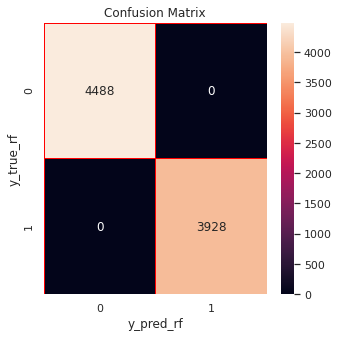

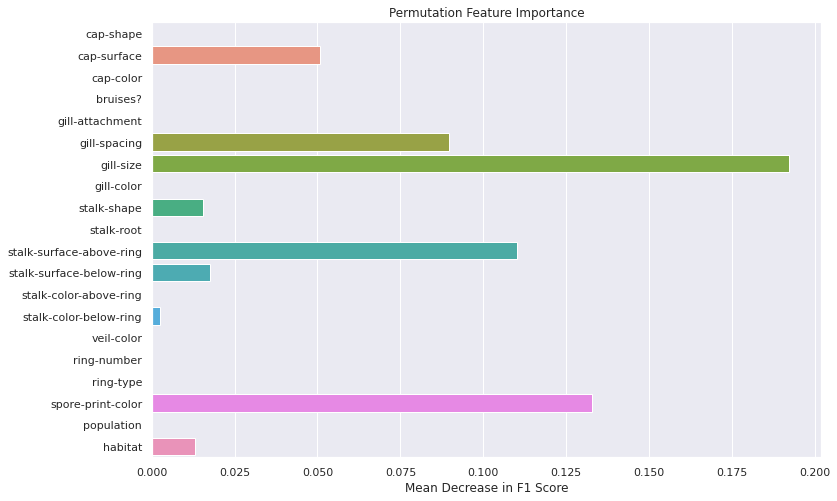

In [34]:
classification(DecisionTreeClassifier, x_visual, y_mushroom, random_state=42)

### C-Support Vector Classifier

Results for SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


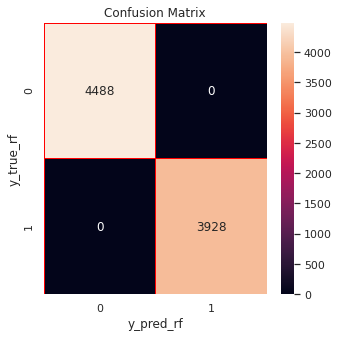

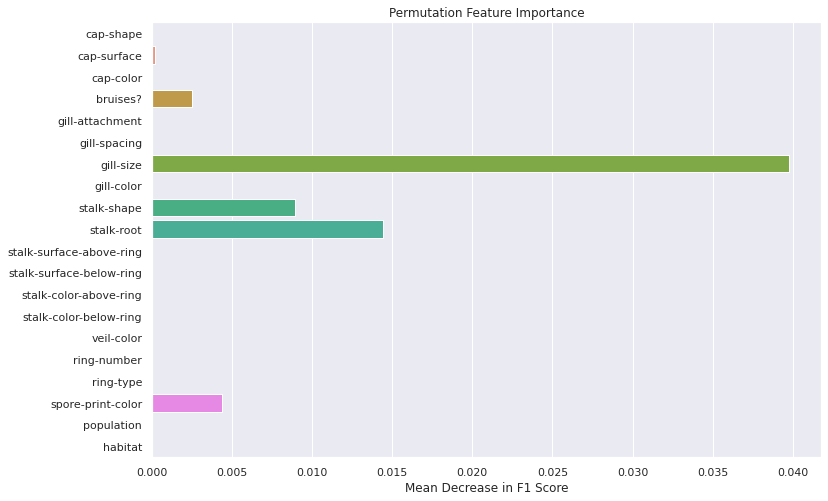

In [35]:
classification(SVC, x_visual, y_mushroom, random_state=42) 

### K-Neighbors Classifier

Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


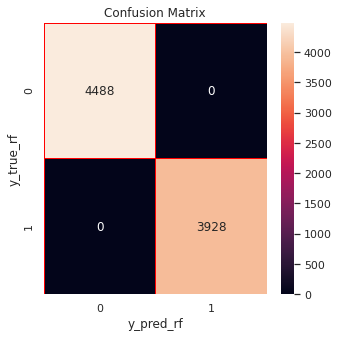

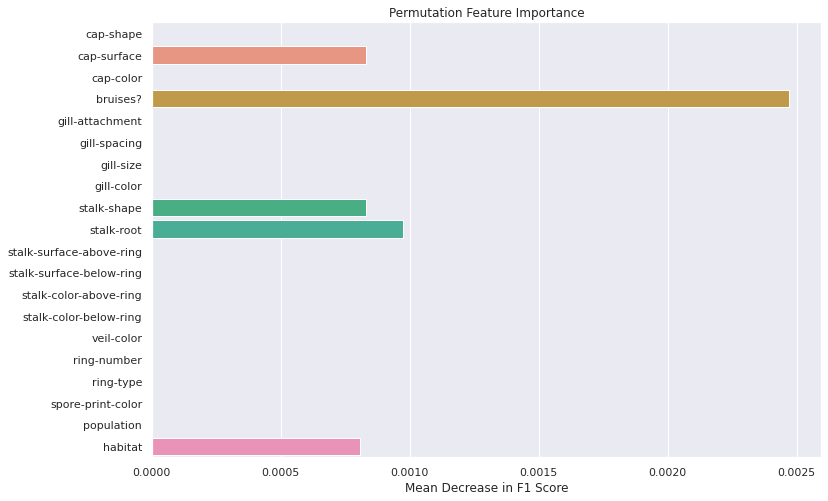

In [36]:
classification(KNeighborsClassifier, x_visual, y_mushroom, n_neighbors=5)

### Logistic Regression Classifier

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 99.94%


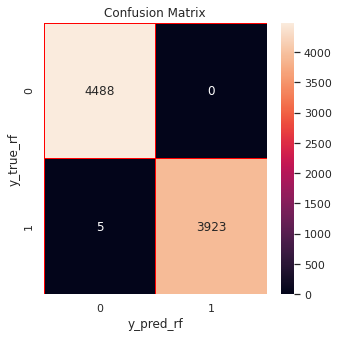

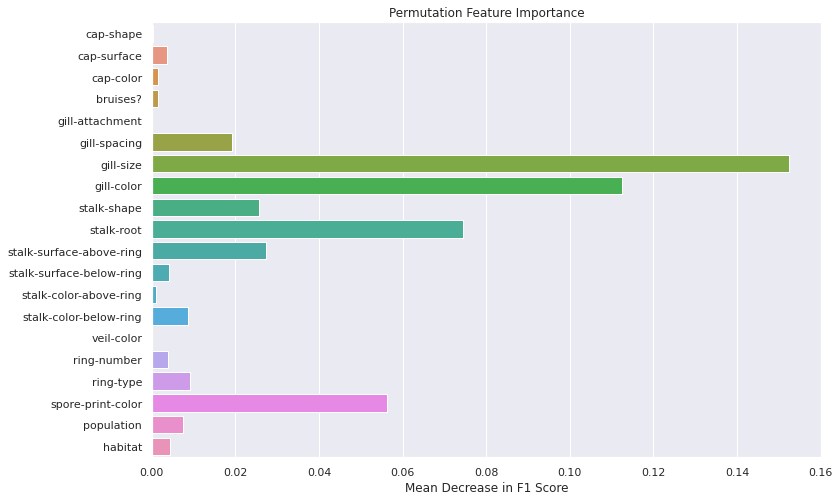

In [37]:
classification(LogisticRegression, x_visual, y_mushroom, max_iter=10000, random_state=42) 

### Gaussian Naive Bayes Classifier

Results for GaussianNB:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82      4488
           1       0.74      1.00      0.85      3928

    accuracy                           0.83      8416
   macro avg       0.87      0.84      0.83      8416
weighted avg       0.88      0.83      0.83      8416

Test Accuracy: 83.38%


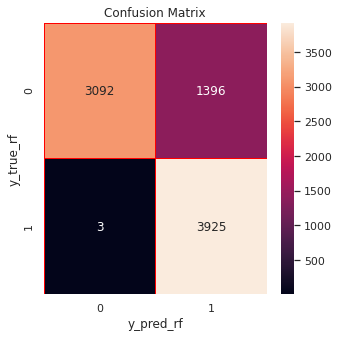

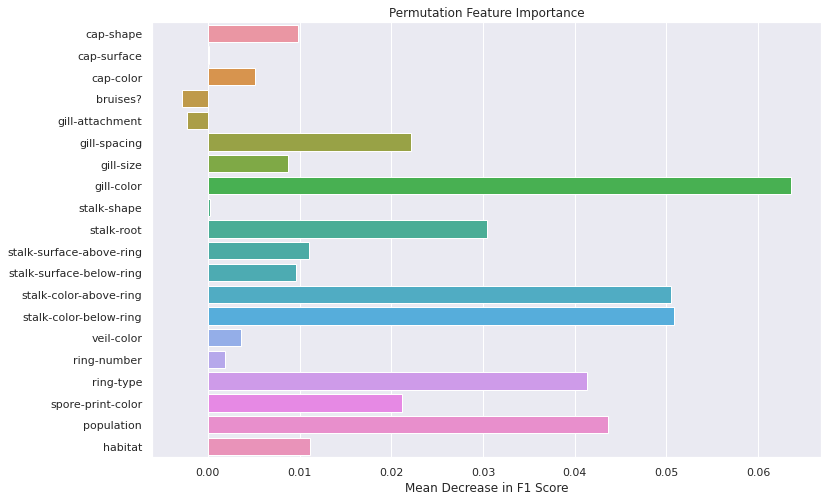

In [38]:
classification(GaussianNB, x_visual, y_mushroom)

### Random Forest Classifier

Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


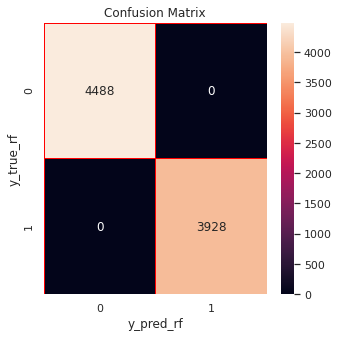

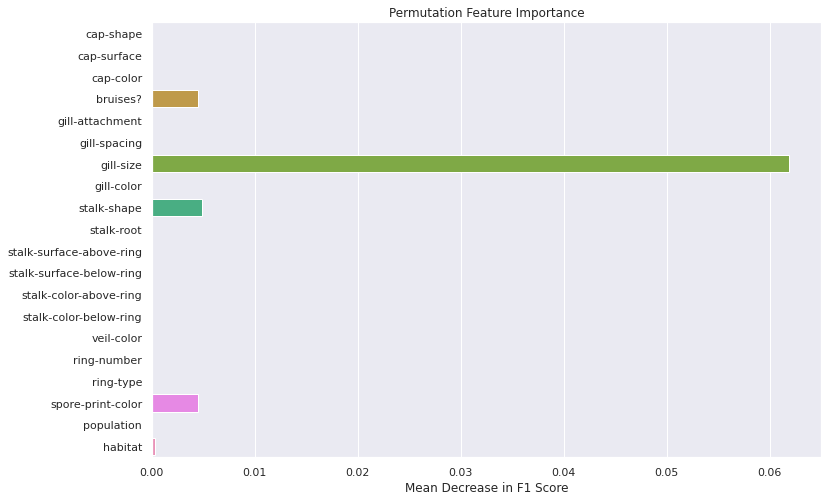

In [39]:
classification(RandomForestClassifier, x_visual, y_mushroom, n_estimators=100, random_state=42)

### Linear Discriminant Classifier

Results for LinearDiscriminantAnalysis:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 99.95%


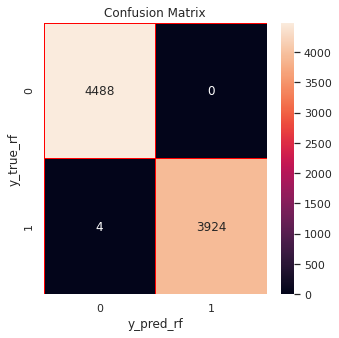

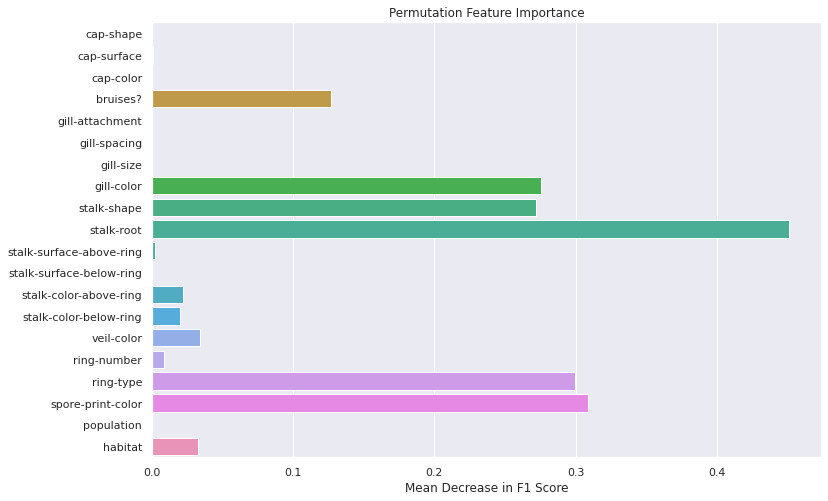

In [40]:
classification(LinearDiscriminantAnalysis, x_visual, y_mushroom)

### Neural Network Multi-layer Perceptron Classifier

Results for MLPClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      3928

    accuracy                           1.00      8416
   macro avg       1.00      1.00      1.00      8416
weighted avg       1.00      1.00      1.00      8416

Test Accuracy: 100.0%


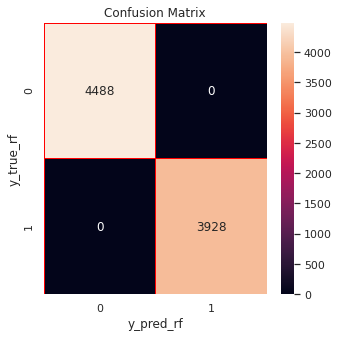

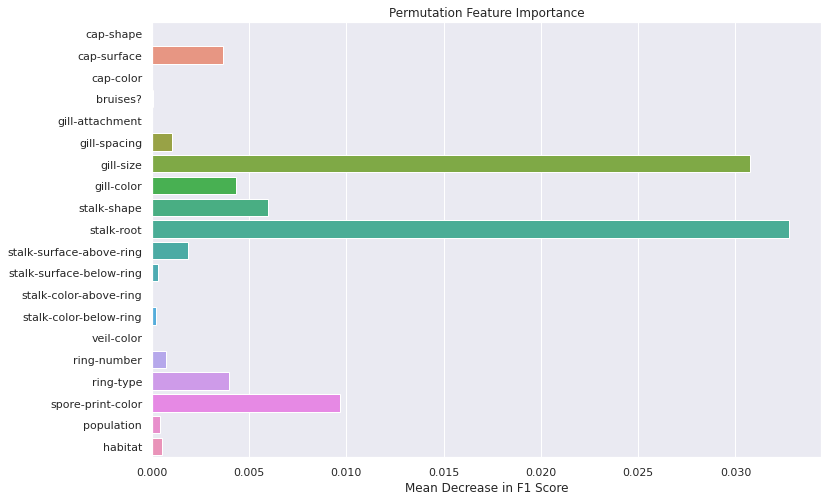

In [41]:
classification(MLPClassifier, x_visual, y_mushroom, random_state=42)

## Conclusions

After examining features of this dataset, performing analysis and feature exploration, and creating some classification models, we can decisively conclude that making a pleasant smelling mushroom stew also equates to making one that will not result in a trip to the hostpital. This is to say, an 'Odor' of None, Anise, or Almond on a mushroom is the strongest indicator of an Edible Mushroom. Following **'Odor'**, **'gill-size-broad**, and **'spore-print-color'**(not chocolate, green or white) are the next best indicators of an edible fungus.

Overall, every classifier performed excellent on the set, all able to classify edible mushrooms with above 96% accuracy. The Decision Tree classifier could be considered the most useful due to its flowchart display, which a forager could print out to accompany them in the woods


If we were to imagine a scenario where the sense of smell is not available to us, then it is important to consider a wider range of factors. The best indicators we could look for would be a broad gill size (**'gill-size'**), a rooted stalk root (**'stalk-root'**) and Crowded **'gill-spacing'**.

In this case, the only classifier that would be advised against would be the Naive Bayes, as it could only predict with 83% accuracy, not a chance many would like to take.